In [1]:
from classifier import *
from gan import *
from synthetic_data_generation import *

D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\synthetic_data_generation.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan: GAN = torch.load(model_

Generated 1000 images with label 0.
Generated 1000 images with label 1.
Generated 1000 images with label 2.
Generated 1000 images with label 3.
Generated 1000 images with label 4.
Generated 1000 images with label 5.
Generated 1000 images with label 6.
Generated 1000 images with label 7.
Generated 1000 images with label 8.
Generated 1000 images with label 9.
Epoch [10/500], Loss: 1.4568


d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:13

Test Accuracy: 39.69%
F1 Score: 0.3654
Precision: 0.7172
Recall: 0.3969

Classification Report:
               precision    recall  f1-score   support

           0     0.5013    0.9560    0.6577      1001
           1     1.0000    0.0053    0.0106      1127
           2     0.7241    0.5721    0.6392       991
           3     0.9286    0.2645    0.4118      1032
           4     0.7004    0.5867    0.6385       980
           5     0.0000    0.0000    0.0000       863
           6     0.9844    0.2485    0.3969      1014
           7     0.9817    0.4019    0.5703      1070
           8     0.1637    0.9502    0.2792       944
           9     1.0000    0.0123    0.0242       978

    accuracy                         0.3969     10000
   macro avg     0.6984    0.3998    0.3628     10000
weighted avg     0.7172    0.3969    0.3654     10000

Epoch [20/500], Loss: 0.9283
Test Accuracy: 55.79%
F1 Score: 0.5564
Precision: 0.7935
Recall: 0.5579

Classification Report:
               prec

Epoch [110/500], Loss: 0.1500
Test Accuracy: 75.78%
F1 Score: 0.7674
Precision: 0.8418
Recall: 0.7578

Classification Report:
               precision    recall  f1-score   support

           0     0.9175    0.9221    0.9198      1001
           1     0.9963    0.4747    0.6430      1127
           2     0.8144    0.7750    0.7942       991
           3     0.7243    0.8682    0.7898      1032
           4     0.8698    0.8796    0.8747       980
           5     0.9569    0.4368    0.5998       863
           6     0.9523    0.8077    0.8741      1014
           7     0.9743    0.7439    0.8437      1070
           8     0.3780    0.9174    0.5354       944
           9     0.7965    0.7526    0.7739       978

    accuracy                         0.7578     10000
   macro avg     0.8380    0.7578    0.7648     10000
weighted avg     0.8418    0.7578    0.7674     10000

Epoch [120/500], Loss: 0.1341
Test Accuracy: 76.10%
F1 Score: 0.7710
Precision: 0.8445
Recall: 0.7610

Classificat

Epoch [210/500], Loss: 0.0602
Test Accuracy: 76.50%
F1 Score: 0.7783
Precision: 0.8511
Recall: 0.7650

Classification Report:
               precision    recall  f1-score   support

           0     0.9213    0.9241    0.9227      1001
           1     0.9948    0.5138    0.6776      1127
           2     0.8376    0.7911    0.8137       991
           3     0.7657    0.8614    0.8108      1032
           4     0.8480    0.8939    0.8703       980
           5     0.9596    0.4959    0.6539       863
           6     0.9664    0.7653    0.8542      1014
           7     0.9648    0.7944    0.8713      1070
           8     0.3716    0.9322    0.5314       944
           9     0.8435    0.6779    0.7517       978

    accuracy                         0.7650     10000
   macro avg     0.8473    0.7650    0.7758     10000
weighted avg     0.8511    0.7650    0.7783     10000

Epoch [220/500], Loss: 0.0560
Test Accuracy: 76.40%
F1 Score: 0.7773
Precision: 0.8505
Recall: 0.7640

Classificat

Epoch [310/500], Loss: 0.0325
Test Accuracy: 75.73%
F1 Score: 0.7726
Precision: 0.8506
Recall: 0.7573

Classification Report:
               precision    recall  f1-score   support

           0     0.9223    0.9251    0.9237      1001
           1     0.9915    0.5173    0.6799      1127
           2     0.8365    0.7952    0.8153       991
           3     0.7692    0.8362    0.8013      1032
           4     0.8410    0.8908    0.8652       980
           5     0.9491    0.4971    0.6525       863
           6     0.9707    0.7505    0.8465      1014
           7     0.9626    0.8168    0.8837      1070
           8     0.3562    0.9354    0.5159       944
           9     0.8682    0.6063    0.7140       978

    accuracy                         0.7573     10000
   macro avg     0.8467    0.7571    0.7698     10000
weighted avg     0.8506    0.7573    0.7726     10000

Epoch [320/500], Loss: 0.0309
Test Accuracy: 75.70%
F1 Score: 0.7726
Precision: 0.8509
Recall: 0.7570

Classificat

Epoch [410/500], Loss: 0.0211
Test Accuracy: 74.97%
F1 Score: 0.7665
Precision: 0.8518
Recall: 0.7497

Classification Report:
               precision    recall  f1-score   support

           0     0.9231    0.9231    0.9231      1001
           1     0.9929    0.4960    0.6615      1127
           2     0.8383    0.8002    0.8188       991
           3     0.7846    0.8188    0.8013      1032
           4     0.8417    0.8847    0.8627       980
           5     0.9485    0.4913    0.6473       863
           6     0.9744    0.7495    0.8473      1014
           7     0.9577    0.8252    0.8865      1070
           8     0.3419    0.9428    0.5018       944
           9     0.8748    0.5644    0.6861       978

    accuracy                         0.7497     10000
   macro avg     0.8478    0.7496    0.7637     10000
weighted avg     0.8518    0.7497    0.7665     10000

Epoch [420/500], Loss: 0.0204
Test Accuracy: 74.82%
F1 Score: 0.7651
Precision: 0.8513
Recall: 0.7482

Classificat

Test Accuracy: 74.67%
F1 Score: 0.7636
Precision: 0.8508
Recall: 0.7467

Classification Report:
               precision    recall  f1-score   support

           0     0.9229    0.9408    0.9318       980
           1     0.9922    0.5595    0.7155      1135
           2     0.8692    0.8052    0.8360      1032
           3     0.7614    0.8119    0.7858      1010
           4     0.8155    0.8554    0.8350       982
           5     0.9714    0.4574    0.6220       892
           6     0.9710    0.7338    0.8359       958
           7     0.9549    0.8035    0.8727      1028
           8     0.3477    0.9497    0.5091       974
           9     0.8855    0.5520    0.6801      1009

    accuracy                         0.7467     10000
   macro avg     0.8492    0.7469    0.7624     10000
weighted avg     0.8508    0.7467    0.7636     10000



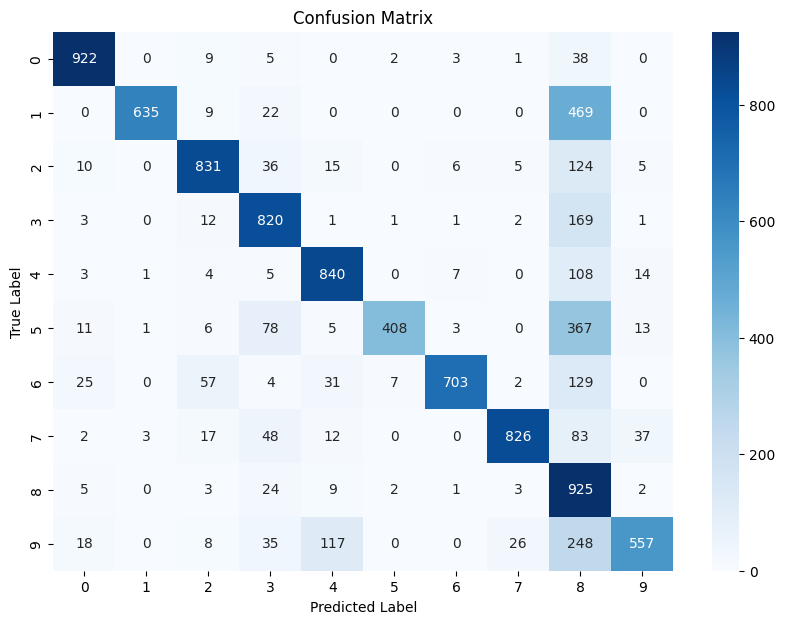

In [3]:
images, labels = generate_synthetic_data()

mnist_classifier = MNISTClassifier(lr=0.001, input_dim=784, output_dim=10, hidden_dim=300, dropout_rate=0.1)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(validation_split=0.2)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(train_data=images, train_labels=labels, validation_split=0.2)
mnist_classifier.train_model(train_loader=train_loader, validation_loader=validation_loader, num_epochs=200)

torch.save(mnist_classifier, 'saved_models/classifier.pth')

true_labels, pred_labels = mnist_classifier.evaluate_model(test_loader)
mnist_classifier.plot_confusion_matrix(true_labels, pred_labels)